In [1]:
from manim import *
import numpy as np
import os

BACKGROUND_COLOR = WHITE
TEXT_COLOR = BLACK
E_COLOR = BLUE
E_COMPONENT_COLOR = BLUE_A
B_COLOR = RED
B_COMPONENT_COLOR = RED_A
PLANE_COLOR = "#c91d02"
INCIDENT_PLANE_COLOR = "#075209"
config.background_color = BACKGROUND_COLOR

Manim Community v0.17.3

[05/11/23 10:03:36] INFO                                                                   ]8;id=597492;file:///home/hari31416/anaconda3/envs/manim/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=564165;file:///home/hari31416/anaconda3/envs/manim/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             '/media/hari31416/Hari_SSD/Users/harik/Desktop/manim/Codes/re                         
                             port/media/images/report/Frame_ManimCE_v0.17.3.png'                                   
                                                                                                                   

                    INFO     Rendered Frame                                                            ]8;id=255068;file:///home/hari31416/anaconda3/envs/manim/lib/python3.10/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=283018;file:///home/hari31416/anaconda3/envs/manim/lib/python3.10/site-packages/manim/scene/scene.py#241\241]8;;\
                             Played 0 animations                                                                   

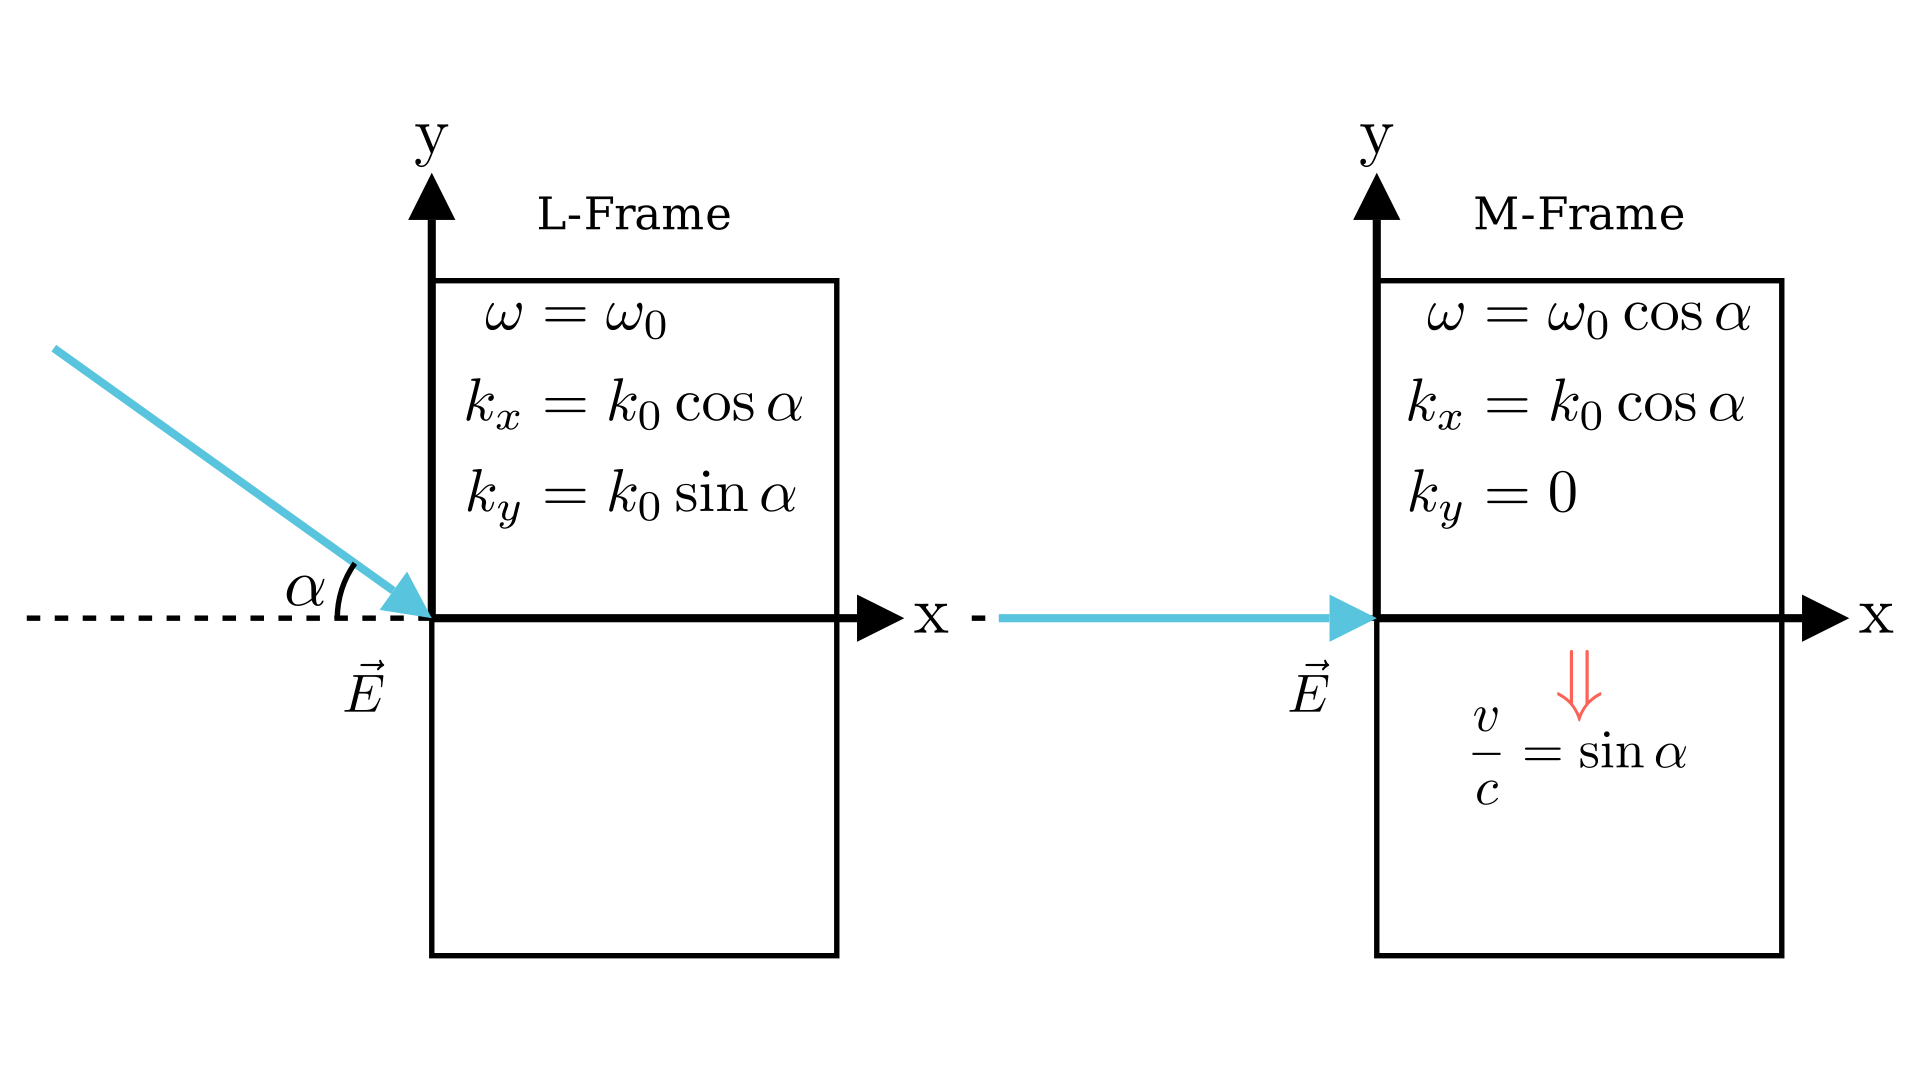

In [3]:
%%manim Frame
class Frame(Scene):
    def construct(self):
        frames = VGroup()
        l_frame = self._frame(frame_name="L")
        m_frame = self._frame(frame_name="M")
        l_frame.move_to(3.5 * LEFT)
        m_frame.move_to(3.5 * RIGHT)
        frames.add(l_frame, m_frame)
        self.add(frames)

    def _frame(self, frame_name="L"):
        frame = VGroup()

        rectangle = Rectangle(color=TEXT_COLOR, height=5, width=3)
        rectangle.name = frame_name
        frame.add(rectangle)
        frame.add(self.add_axes(rectangle))
        length = 3
        dash_line_start = rectangle.get_edge_center(LEFT) - length * RIGHT
        dash_line_end = rectangle.get_edge_center(LEFT)
        dash_line = DashedLine(
            start=dash_line_start, end=dash_line_end, color=TEXT_COLOR, dash_length=0.1
        )
        frame.add(dash_line)
        frame_label = (
            Text(f"{frame_name}-Frame", color=TEXT_COLOR)
            .move_to(rectangle.get_edge_center(UP) + 0.5 * UP)
            .scale(0.5)
        )
        frame.add(frame_label)
        ray = self.add_ray(rectangle)
        frame.add(ray)
        frame_details = self._frame_detail(frame_name)
        frame_details.move_to(rectangle.get_edge_center(UP) + 1.0 * DOWN)
        frame.add(frame_details)
        if rectangle.name == "L":
            # plot angle between ray and dash line
            angle = Angle(
                ray,
                dash_line,
                radius=0.7,
                other_angle=False,
                color=TEXT_COLOR,
                quadrant=(-1, -1),
            )
            angle_label = Tex(r"$\alpha$", color=TEXT_COLOR).move_to(
                angle.get_center() - 0.3 * RIGHT
            )
            frame.add(angle, angle_label)

        if frame_name == "M":
            down_arrow = (
                MathTex(r"\Downarrow", color=RED)
                .move_to(ORIGIN + 0.5 * DOWN)
                .scale(1.2)
            )
            down_arrow_label = (
                MathTex(r"\frac{v}{c} = \sin{\alpha}", color=TEXT_COLOR)
                .move_to(down_arrow.get_center_of_mass() + 0.5 * DOWN)
                .scale(0.8)
            )
            frame.add(down_arrow, down_arrow_label)
        return frame

    def add_axes(self, frame):
        axes = VGroup()
        x_line = Arrow(
            start=frame.get_edge_center(LEFT),
            end=frame.get_edge_center(RIGHT) + 0.5 * RIGHT,
            color=TEXT_COLOR,
            buff=0,
        )
        x_line_label = Tex("x", color=TEXT_COLOR).move_to(
            x_line.get_end() + 0.2 * RIGHT
        )
        rect_left_top_corner = frame.get_edge_center(LEFT) + 3.3 * UP
        rect_left_bottom_corner = frame.get_edge_center(LEFT)
        y_line = Arrow(
            end=rect_left_top_corner,
            start=rect_left_bottom_corner,
            color=TEXT_COLOR,
            buff=0,
        )
        y_line_label = Tex("y", color=TEXT_COLOR).move_to(y_line.get_end() + 0.2 * UP)
        axes.add(x_line, x_line_label, y_line, y_line_label)
        return axes

    def add_ray(self, frame):
        if frame.name == "L":
            start_pos = frame.get_edge_center(LEFT)
            end_pos = frame.get_edge_center(LEFT)
            start_pos[0] -= 2.8
            start_pos[1] += 2
        else:
            start_pos = frame.get_edge_center(LEFT)
            end_pos = frame.get_edge_center(LEFT)
            start_pos[0] += -2.8
        ray = Arrow(
            start=start_pos,
            end=end_pos,
            color=E_COLOR,
            buff=0,
        )
        ray_label = (
            MathTex(r"\vec{E}", color=TEXT_COLOR)
            .move_to(ray.get_end() + 0.5 * LEFT + 0.5 * DOWN)
            .scale(0.8)
        )
        ray.add(ray_label)
        return ray

    def _frame_detail(self, frame_name):
        if frame_name == "L":
            return self.l_frame_details()
        else:
            return self.m_frame_details()

    def l_frame_details(self):
        text_detail = r"""\omega &= \omega_0\\
        k_x &= k_0 \cos \alpha\\
        k_y &= k_0 \sin \alpha
        """
        text = MathTex(text_detail, color=TEXT_COLOR).scale(0.9)
        return text

    def m_frame_details(self):
        text_detail = r"""\omega &= \omega_0 \cos\alpha\\
        k_x &= k_0 \cos \alpha\\
        k_y &= 0
        """
        text = MathTex(text_detail, color=TEXT_COLOR).scale(0.9)
        return text
